<a href="https://colab.research.google.com/github/supatsara2002/bsc_dpdm22/blob/main/%5Bdataprep1%5Dproperty_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#สรุปข้อมูลของนักประเมินแต่ละคน โดยพิจารณาจาก ความมั่นใจในการประเมิน ประเมินราคาซื้อขาย ให้คะแนนทรัพย์

In [3]:
file = '/content/drive/MyDrive/bsc_DPDM_data/คำตอบนักประเมิน.xlsx'

##บ้าน

In [4]:
home = pd.read_excel(file,sheet_name='บ้าน')

In [5]:
home.head(2)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,100.0
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN,NaN


In [6]:
home.columns

Index(['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ปัจจัยในการประเมินราคาซื้อ-ขาย', 'เหตุผลไม่มั่นใจราคาประเมิน',
       'ให้คะแนนทรัพย์', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [7]:
home = home[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
home.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย               True
ให้คะแนนทรัพย์                    True
dtype: bool

In [8]:
home = home.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์'])
home.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

### นักประเมินคนที่ 1

In [9]:
est1 = home[home['ID ผู้ประเมิน']==1]
est1

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2200000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,5900000.0,5000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
6,1,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000.0,3500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
8,1,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000.0,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...
155,1,https://nayoo.co/khonkaen/posts/19495,บ้านเดี่ยว,มั่นใจ,5500000.0,4500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
156,1,https://nayoo.co/khonkaen/posts/19496,บ้านเดี่ยว,มั่นใจ,7911000.0,5200000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
157,1,https://nayoo.co/khonkaen/posts/20,บ้านเดี่ยว,มั่นใจ,2000000.0,3600000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
158,1,https://nayoo.co/khonkaen/posts/31,บ้านเดี่ยว,มั่นใจ,4000000.0,4000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [10]:
est1.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,100.0,1.000000e+02,1.000000e+02
mean,1.0,4.316360e+06,3.938500e+06
std,0.0,2.865391e+06,2.368553e+06
min,1.0,3.900000e+05,6.000000e+05
25%,1.0,2.892750e+06,2.775000e+06
50%,1.0,3.962000e+06,3.600000e+06
75%,1.0,5.000000e+06,4.500000e+06
max,1.0,2.094900e+07,1.600000e+07


In [11]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [12]:
from matplotlib import pyplot as plt

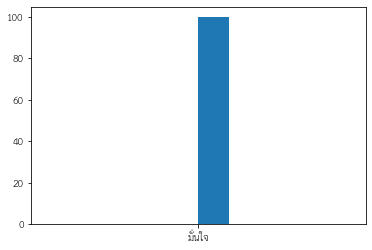

In [13]:
ret1_conf = plt.hist(est1['ความมั่นใจในการเมินราคาทรัพย์'])

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

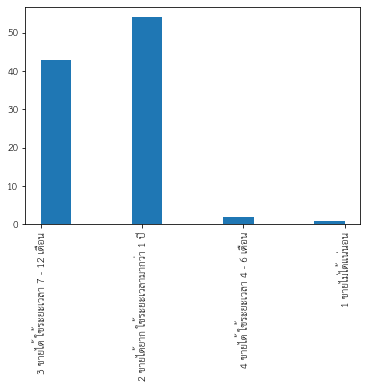

In [14]:
ret1_score = plt.hist(est1['ให้คะแนนทรัพย์'])
plt.xticks(rotation='vertical')

In [15]:
ret1_score

(array([43.,  0.,  0., 54.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

In [16]:
est1['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    54
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     43
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       2
1 ขายไม่ได้แน่นอน                      1
Name: ให้คะแนนทรัพย์, dtype: int64

In [17]:
est1.groupby(['ให้คะแนนทรัพย์']).count()

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
ให้คะแนนทรัพย์,,,,,,
1 ขายไม่ได้แน่นอน,1,1,1,1,1,1
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,54,54,54,54,54,54
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,43,43,43,43,43,43
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2,2,2,2,2,2


In [18]:
est1[est1['ให้คะแนนทรัพย์']=='2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี'].count()

ID ผู้ประเมิน                    54
post id                          54
property_type                    54
ความมั่นใจในการเมินราคาทรัพย์    54
ราคาทรัพย์                       54
ประเมินราคาซื้อ-ขาย              54
ให้คะแนนทรัพย์                   54
dtype: int64

In [19]:
est1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

### นักประเมินคนที่ 2

In [20]:
est2 = home[home['ID ผู้ประเมิน']==2]
print(f'ประเมินทั้งหมด {len(est2)}')

ประเมินทั้งหมด 89


In [21]:
est2.describe()['ประเมินราคาซื้อ-ขาย']

count    8.900000e+01
mean     4.153258e+06
std      2.386901e+06
min      9.900000e+05
25%      2.600000e+06
50%      3.900000e+06
75%      4.900000e+06
max      1.700000e+07
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [22]:
est2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     64
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      23
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน      1
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     1
Name: ให้คะแนนทรัพย์, dtype: int64

In [23]:
est2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    89
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [24]:
est2 = est2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])

##ที่ดิน

In [25]:
area = pd.read_excel(file,sheet_name='ที่ดิน')

In [26]:
area.head(2)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,1800000.0,"8,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,100.0
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2.0,ขายได้ ใช้ระยะเวลา 4-6 เดือน,NaN,NaN


In [27]:
area = area[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
area.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย               True
ให้คะแนนทรัพย์                    True
dtype: bool

In [28]:
area = area.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์'])
area.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

### นักประเมินคนที่ 1

In [29]:
area1 = area[area['ID ผู้ประเมิน']==1]
print(f'ประเมินทั้งหมด {len(area1)}')

ประเมินทั้งหมด 100


In [30]:
area1.describe()['ประเมินราคาซื้อ-ขาย']

count    1.000000e+02
mean     9.069000e+06
std      2.322360e+07
min      5.000000e+05
25%      1.675000e+06
50%      3.175000e+06
75%      1.000000e+07
max      2.220000e+08
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [31]:
area1['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    55
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     45
Name: ให้คะแนนทรัพย์, dtype: int64

In [32]:
area1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

###นักประเมินคนที่ 2

In [33]:
area2 = area[area['ID ผู้ประเมิน']==2]
print(f'ประเมินทั้งหมด {len(area2)}')

ประเมินทั้งหมด 100


In [34]:
area2.describe()['ประเมินราคาซื้อ-ขาย']

count    1.000000e+02
mean     1.196550e+07
std      2.843751e+07
min      7.000000e+05
25%      1.800000e+06
50%      3.800000e+06
75%      1.000000e+07
max      2.500000e+08
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [35]:
area2['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    52
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     45
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน       3
Name: ให้คะแนนทรัพย์, dtype: int64

In [36]:
area2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    100
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

##คอนโด

In [37]:
condo = pd.read_excel(file,sheet_name='คอนโด')

In [38]:
condo.head(2)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10
0,1,32.0,คอนโด,มั่นใจ,3500000.0,3500000.0,"60,000-130,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1,1,36.0,คอนโด,มั่นใจ,1930000.0,2200000.0,"50,000-90,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [39]:
condo = condo[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
condo.isnull().any()


ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

###นักประเมินคนที่ 1

In [40]:
cd1 = condo[condo['ID ผู้ประเมิน']==1]
print(f'ประเมินทั้งหมด {len(cd1)}')

ประเมินทั้งหมด 10


In [41]:
cd1.describe()['ประเมินราคาซื้อ-ขาย']

count    1.000000e+01
mean     2.275000e+06
std      6.705098e+05
min      1.500000e+06
25%      1.650000e+06
50%      2.250000e+06
75%      2.775000e+06
max      3.500000e+06
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [42]:
cd1['ให้คะแนนทรัพย์'].value_counts()

4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน     9
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน    1
Name: ให้คะแนนทรัพย์, dtype: int64

In [43]:
cd1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    10
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

###นักประเมินคนที่ 2

In [44]:
cd2 = condo[condo['ID ผู้ประเมิน']==2]
print(f'ประเมินทั้งหมด {len(cd2)}')

ประเมินทั้งหมด 0


##ทาวน์โฮม

In [45]:
townhome = pd.read_excel(file,sheet_name='ทาวน์โฮม')

In [46]:
townhome.head(2)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,120.0
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN


In [47]:
townhome = townhome[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
townhome.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

In [48]:
townhome = townhome.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์'])
townhome.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

###นักประเมินคนที่ 1

In [49]:
th1 = townhome[townhome['ID ผู้ประเมิน']==1]
print(f'ประเมินทั้งหมด {len(th1)}')

ประเมินทั้งหมด 120


In [50]:
th1.describe()['ประเมินราคาซื้อ-ขาย']

count    1.200000e+02
mean     1.832750e+06
std      8.027065e+05
min      3.500000e+05
25%      1.300000e+06
50%      1.600000e+06
75%      2.500000e+06
max      4.200000e+06
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [51]:
th1['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     100
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     14
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน        6
Name: ให้คะแนนทรัพย์, dtype: int64

In [52]:
th1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    120
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

###นักประเมินคนที่ 2

In [53]:
th2 = townhome[townhome['ID ผู้ประเมิน']==2]
print(f'ประเมินทั้งหมด {len(th2)}')

ประเมินทั้งหมด 120


In [54]:
th2.describe()['ประเมินราคาซื้อ-ขาย']

count    1.200000e+02
mean     1.823083e+06
std      7.744988e+05
min      4.000000e+05
25%      1.200000e+06
50%      1.700000e+06
75%      2.300000e+06
max      4.000000e+06
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [55]:
th2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     103
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี      7
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน        7
1 ขายไม่ได้แน่นอน                       2
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน       1
Name: ให้คะแนนทรัพย์, dtype: int64

In [56]:
th2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    120
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

##อาคารพาณิชย์

In [57]:
building = pd.read_excel(file,sheet_name='อาคารพาณิชย์')

In [58]:
building.head(2)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,6000000.0,"8,000-30,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน,NaN,NaN,10.0
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN


In [59]:
building = building[['ID ผู้ประเมิน', 'post id', 'property_type',
       'ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',
       'ให้คะแนนทรัพย์']]
building.isnull().any()

ID ผู้ประเมิน                    False
post id                          False
property_type                    False
ความมั่นใจในการเมินราคาทรัพย์    False
ราคาทรัพย์                       False
ประเมินราคาซื้อ-ขาย              False
ให้คะแนนทรัพย์                   False
dtype: bool

###นักประเมินคนที่ 1

In [60]:
bd1 = building[building['ID ผู้ประเมิน']==1]
print(f'ประเมินทั้งหมด {len(bd1)}')

ประเมินทั้งหมด 10


In [61]:
bd1.describe()['ประเมินราคาซื้อ-ขาย']

count    1.000000e+01
mean     6.260000e+06
std      3.913850e+06
min      2.200000e+06
25%      3.650000e+06
50%      5.000000e+06
75%      7.750000e+06
max      1.350000e+07
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [62]:
bd1['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    5
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     3
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      2
Name: ให้คะแนนทรัพย์, dtype: int64

In [63]:
bd1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    10
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

###นักประเมินคนที่ 2

In [64]:
bd2 = building[building['ID ผู้ประเมิน']==2]
print(f'ประเมินทั้งหมด {len(bd2)}')

ประเมินทั้งหมด 10


In [65]:
bd2.describe()['ประเมินราคาซื้อ-ขาย']

count    1.000000e+01
mean     7.610000e+06
std      5.408728e+06
min      2.100000e+06
25%      4.000000e+06
50%      6.500000e+06
75%      9.500000e+06
max      2.000000e+07
Name: ประเมินราคาซื้อ-ขาย, dtype: float64

In [66]:
bd2['ให้คะแนนทรัพย์'].value_counts()

2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    5
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      3
3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     2
Name: ให้คะแนนทรัพย์, dtype: int64

In [67]:
bd2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    10
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

#เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์แต่ละทรัพย์ของนักประเมินแต่ละคนและของราคาตั้งขาย

ใช้ MAPE เป็นเกณฑ์ในการเปรียบเทียบ

hint เริ่มต้นมาเราอยากได้ตารางรูปแบบนี้ก่อน
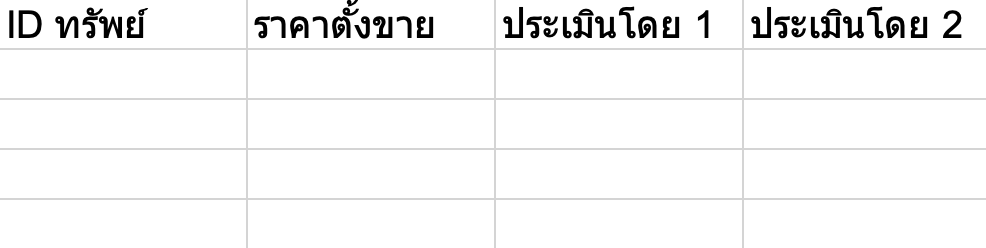

##ตารางประเมินบ้าน

In [68]:
est2['ประเมินโดยคนที่ 1'] = est2['post id'].map(est1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
est2.head(2)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมินโดยคนที่ 1
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2500000.0
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0


In [69]:
est2['ประเมินโดยคนที่ 2'] = est2['post id'].map(est2.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
est2.head(2)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2700000.0,2700000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2500000.0,2700000.0
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000.0,2400000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0,2400000.0


In [70]:
T_home = est2[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2']]
T_home

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4400000.0,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2750000.0,2500000.0,2500000.0
...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,5500000.0,4500000.0,5000000.0
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0


In [71]:
T_home.isnull().any()

post id              False
ราคาทรัพย์           False
ประเมินโดยคนที่ 1    False
ประเมินโดยคนที่ 2    False
dtype: bool

##ตารางประเมินที่ดิน

In [72]:
area2['ประเมินโดยคนที่ 1'] = area2['post id'].map(area1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
area2.head(2)

<ipython-input-72-fd89cfe77fb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area2['ประเมินโดยคนที่ 1'] = area2['post id'].map(area1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมินโดยคนที่ 1
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,1800000.0
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,8000000.0


In [73]:
area2['ประเมินโดยคนที่ 2'] = area2['post id'].map(area2.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
area2.head(2)

<ipython-input-73-10afbaf5386b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area2['ประเมินโดยคนที่ 2'] = area2['post id'].map(area2.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,1800000.0,2000000.0
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,8000000.0,12000000.0


In [74]:
T_area = area2[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2']]
T_area

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0
...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0


In [75]:
T_area.isnull().any()

post id              False
ราคาทรัพย์           False
ประเมินโดยคนที่ 1    False
ประเมินโดยคนที่ 2    False
dtype: bool

##ตารางประเมินคอนโด

In [76]:
cd1.head(2)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,32.0,คอนโด,มั่นใจ,3500000.0,3500000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
1,1,36.0,คอนโด,มั่นใจ,1930000.0,2200000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน


In [77]:
cd1['ประเมินโดยคนที่ 1'] = cd1['post id'].map(cd1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
cd1.head(2)

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมินโดยคนที่ 1
0,1,32.0,คอนโด,มั่นใจ,3500000.0,3500000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,3500000.0
1,1,36.0,คอนโด,มั่นใจ,1930000.0,2200000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2200000.0


In [78]:
T_condo = cd1[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1']]
T_condo

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1
0,32.0,3500000.0,3500000.0
1,36.0,1930000.0,2200000.0
2,603.0,2438000.0,2800000.0
3,1395.0,1600000.0,2300000.0
4,1443.0,1860000.0,1800000.0
5,1609.0,1490000.0,1500000.0
6,1640.0,1280000.0,1600000.0
7,1641.0,4290000.0,2700000.0
8,1650.0,1700000.0,1550000.0
9,1840.0,3790000.0,2800000.0


In [79]:
T_condo.isnull().any()

post id              False
ราคาทรัพย์           False
ประเมินโดยคนที่ 1    False
dtype: bool

##ตารางประเมินทาวน์โฮม

In [80]:
th2['ประเมินโดยคนที่ 1'] = th2['post id'].map(th1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
th2.head(2)

<ipython-input-80-186fca2998a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  th2['ประเมินโดยคนที่ 1'] = th2['post id'].map(th1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมินโดยคนที่ 1
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,1500000.0,1 ขายไม่ได้แน่นอน,700000.0
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,1500000.0,1 ขายไม่ได้แน่นอน,700000.0


In [81]:
th2['ประเมินโดยคนที่ 2'] = th2['post id'].map(th2.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
th2.head(2)

<ipython-input-81-9f89c311f597>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  th2['ประเมินโดยคนที่ 2'] = th2['post id'].map(th2.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000.0,1500000.0,1 ขายไม่ได้แน่นอน,700000.0,1500000.0
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000.0,1500000.0,1 ขายไม่ได้แน่นอน,700000.0,1500000.0


In [82]:
T_townhome = th2[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2']]
T_townhome

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2
1,https://nayoo.co/khonkaen/posts/548,1045000.0,700000.0,1500000.0
3,https://nayoo.co/khonkaen/posts/549,935000.0,700000.0,1500000.0
5,https://nayoo.co/khonkaen/posts/579,3520000.0,3500000.0,4000000.0
7,https://nayoo.co/khonkaen/posts/580,3850000.0,3500000.0,3200000.0
9,https://nayoo.co/khonkaen/posts/582,990000.0,1000000.0,800000.0
...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1430000.0,1000000.0,1200000.0
236,https://nayoo.co/khonkaen/posts/18551,1980000.0,1500000.0,1700000.0
237,https://nayoo.co/khonkaen/posts/19434,2000000.0,1600000.0,1900000.0
238,https://nayoo.co/khonkaen/posts/19501,1790000.0,1600000.0,1700000.0


In [83]:
T_townhome.isnull().any()

post id              False
ราคาทรัพย์           False
ประเมินโดยคนที่ 1    False
ประเมินโดยคนที่ 2    False
dtype: bool

##ตารางประเมินอาคารพาณิชย์

In [84]:
bd2['ประเมินโดยคนที่ 1'] = bd2['post id'].map(bd1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
bd2.head(2)

<ipython-input-84-f525d0ba3189>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bd2['ประเมินโดยคนที่ 1'] = bd2['post id'].map(bd1.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมินโดยคนที่ 1
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,6000000.0
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,12000000.0


In [85]:
bd2['ประเมินโดยคนที่ 2'] = bd2['post id'].map(bd2.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
bd2.head(2)

<ipython-input-85-24f02066a52d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bd2['ประเมินโดยคนที่ 2'] = bd2['post id'].map(bd2.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,7000000.0,8000000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,6000000.0,8000000.0
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000.0,12000000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,12000000.0,12000000.0


In [86]:
T_building = bd2[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2']]
T_building

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0
11,https://nayoo.co/khonkaen/posts/30,4800000.0,3600000.0,4000000.0
13,https://nayoo.co/khonkaen/posts/35,2400000.0,2500000.0,2100000.0
15,https://nayoo.co/khonkaen/posts/497,5000000.0,3800000.0,5000000.0
17,https://nayoo.co/khonkaen/posts/498,7000000.0,7000000.0,8000000.0
19,https://nayoo.co/khonkaen/posts/499,9000000.0,8000000.0,10000000.0


In [87]:
T_building.isnull().any()

post id              False
ราคาทรัพย์           False
ประเมินโดยคนที่ 1    False
ประเมินโดยคนที่ 2    False
dtype: bool

## ค่า **MAPE**

In [88]:
from sklearn.metrics import mean_absolute_percentage_error

###บ้าน

In [89]:
h = T_home['ราคาทรัพย์']
h_1 = T_home['ประเมินโดยคนที่ 1']
h_2 = T_home['ประเมินโดยคนที่ 2']

In [90]:
mean_absolute_percentage_error(h,h_1 )
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์ของบ้าน และ ราคาของผู้ประเมินคนที่ 1 เท่ากับ {mean_absolute_percentage_error(h,h_1 )*100:,.2f}')

ค่า MAPE ระหว่าง ราคาทรัพย์ของบ้าน และ ราคาของผู้ประเมินคนที่ 1 เท่ากับ 12.32


In [91]:
mean_absolute_percentage_error(h,h_2 )
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์ของบ้าน และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ {mean_absolute_percentage_error(h,h_2 )*100:,.2f}')

ค่า MAPE ระหว่าง ราคาทรัพย์ของบ้าน และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ 10.42


In [92]:
mean_absolute_percentage_error(h_1,h_2 )
print(f'ค่า MAPE ระหว่าง ราคาของผู้ประเมินคนที่ 1 และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ {mean_absolute_percentage_error(h_1,h_2 )*100:,.2f}')

ค่า MAPE ระหว่าง ราคาของผู้ประเมินคนที่ 1 และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ 13.63


###ที่ดิน

In [93]:
A = T_area['ราคาทรัพย์']
A_1 = T_area['ประเมินโดยคนที่ 1']
A_2 = T_area['ประเมินโดยคนที่ 2']

In [94]:
mean_absolute_percentage_error(A,A_1 )
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์ของที่ดิน และ ราคาของผู้ประเมินคนที่ 1 เท่ากับ {mean_absolute_percentage_error(A,A_1 )*100:,.2f}')

ค่า MAPE ระหว่าง ราคาทรัพย์ของที่ดิน และ ราคาของผู้ประเมินคนที่ 1 เท่ากับ 41.34


In [95]:
mean_absolute_percentage_error(A,A_2 )
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์ของที่ดิน และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ {mean_absolute_percentage_error(A,A_2 )*100:,.2f}')

ค่า MAPE ระหว่าง ราคาทรัพย์ของที่ดิน และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ 40.12


In [96]:
mean_absolute_percentage_error(A_1,A_2 )
print(f'ค่า MAPE ระหว่าง ราคาของผู้ประเมินคนที่ 1 และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ {mean_absolute_percentage_error(A_1,A_2 )*100:,.2f}')

ค่า MAPE ระหว่าง ราคาของผู้ประเมินคนที่ 1 และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ 74.08


###คอนโด

In [97]:
CD = T_condo['ราคาทรัพย์']
cd_1 = T_condo['ประเมินโดยคนที่ 1']

In [98]:
mean_absolute_percentage_error(CD,cd_1 )
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์ของคอนโด และ ราคาของผู้ประเมินคนที่ 1 เท่ากับ {mean_absolute_percentage_error(CD,cd_1 )*100:,.2f}')

ค่า MAPE ระหว่าง ราคาทรัพย์ของคอนโด และ ราคาของผู้ประเมินคนที่ 1 เท่ากับ 17.35


###ทาวน์โฮม

In [99]:
TH = T_townhome['ราคาทรัพย์']
th_1 = T_townhome['ประเมินโดยคนที่ 1']
th_2 = T_townhome['ประเมินโดยคนที่ 2']

In [100]:
mean_absolute_percentage_error(TH,th_1 )
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์ของทาวน์โฮม และ ราคาของผู้ประเมินคนที่ 1 เท่ากับ {mean_absolute_percentage_error(TH,th_1 )*100:,.2f}')

ค่า MAPE ระหว่าง ราคาทรัพย์ของทาวน์โฮม และ ราคาของผู้ประเมินคนที่ 1 เท่ากับ 11.37


In [101]:
mean_absolute_percentage_error(TH,th_2 )
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์ของทาวน์โฮม และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ {mean_absolute_percentage_error(TH,th_2 )*100:,.2f}')

ค่า MAPE ระหว่าง ราคาทรัพย์ของทาวน์โฮม และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ 8.77


In [102]:
mean_absolute_percentage_error(th_1,th_2 )
print(f'ค่า MAPE ระหว่าง ราคาของผู้ประเมินคนที่ 1 และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ {mean_absolute_percentage_error(th_1,th_2 )*100:,.2f}')

ค่า MAPE ระหว่าง ราคาของผู้ประเมินคนที่ 1 และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ 11.21


###อาคารพาณิชย์

In [103]:
BD = T_building['ราคาทรัพย์']
bd_1 = T_building['ประเมินโดยคนที่ 1']
bd_2 = T_building['ประเมินโดยคนที่ 2']

In [104]:
mean_absolute_percentage_error(BD,bd_1 )
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์ของอาคารพาณิชย์ และ ราคาของผู้ประเมินคนที่ 1 เท่ากับ {mean_absolute_percentage_error(BD,bd_1 )*100:,.2f}')

ค่า MAPE ระหว่าง ราคาทรัพย์ของอาคารพาณิชย์ และ ราคาของผู้ประเมินคนที่ 1 เท่ากับ 17.64


In [105]:
mean_absolute_percentage_error(BD,bd_2 )
print(f'ค่า MAPE ระหว่าง ราคาทรัพย์ของอาคารพาณิชย์ และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ {mean_absolute_percentage_error(BD,bd_2 )*100:,.2f}')

ค่า MAPE ระหว่าง ราคาทรัพย์ของอาคารพาณิชย์ และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ 11.73


In [106]:
mean_absolute_percentage_error(bd_1,bd_2 )
print(f'ค่า MAPE ระหว่าง ราคาของผู้ประเมินคนที่ 1 และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ {mean_absolute_percentage_error(bd_1,bd_2 )*100:,.2f}')

ค่า MAPE ระหว่าง ราคาของผู้ประเมินคนที่ 1 และ ราคาของผู้ประเมินคนที่ 2 เท่ากับ 21.58


##เขียน function ตารางสอบค่าที่เติม 0 ผิด

In [107]:
max(10,2)

10

In [108]:
def check_v(in1,in2):
    return max(in1/in2,in2/in1)

In [109]:
check_v(100,12)

8.333333333333334

In [110]:
check_v(100,1200)

12.0

In [111]:
T_home

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4400000.0,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2750000.0,2500000.0,2500000.0
...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,5500000.0,4500000.0,5000000.0
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0


In [112]:
check1 = list()
for row in T_home.iterrows():
    check1.append(check_v(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดยคนที่ 1']))
check1

[1.08,
 1.1818181818181819,
 1.18,
 1.2571428571428571,
 1.1,
 1.271111111111111,
 1.36,
 1.0153846153846153,
 1.3684,
 1.031941031941032,
 1.0476190476190477,
 1.1785714285714286,
 1.0592592592592593,
 1.188,
 1.1275,
 1.1,
 1.1157142857142857,
 1.0371428571428571,
 1.0588235294117647,
 1.2571428571428571,
 1.13125,
 1.0,
 1.0888888888888888,
 1.0892333472978635,
 1.0444444444444445,
 1.0,
 1.0434782608695652,
 1.02,
 1.25,
 1.13,
 1.0714285714285714,
 1.0,
 1.0,
 1.3833333333333333,
 1.03125,
 1.1611111111111112,
 1.0526315789473684,
 1.5384615384615385,
 1.0227272727272727,
 1.1363636363636365,
 1.1111111111111112,
 1.1290322580645162,
 1.1388888888888888,
 1.0,
 1.0933333333333333,
 1.3093125,
 1.21,
 1.24,
 1.1642857142857144,
 1.1,
 1.4685314685314685,
 1.1111111111111112,
 1.1942857142857144,
 1.0714285714285714,
 1.0710526315789475,
 1.4575,
 1.046,
 1.09375,
 1.044932079414838,
 1.1090909090909091,
 1.1333333333333333,
 1.1866666666666668,
 1.036,
 1.0031347962382444,
 1.06060

In [113]:
T_home ['check1_2'] = check1
T_home

<ipython-input-113-2fe70c34dae5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_home ['check1_2'] = check1


,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2,check1_2
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0,1.080000
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0,1.181818
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0,1.180000
7,https://nayoo.co/khonkaen/posts/564,4400000.0,3500000.0,3700000.0,1.257143
9,https://nayoo.co/khonkaen/posts/566,2750000.0,2500000.0,2500000.0,1.100000
...,...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,5500000.0,4500000.0,5000000.0,1.222222
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0,1.521346
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0,1.800000
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0,1.000000


In [114]:
T_home['check2']= T_home.apply(lambda x:check_v(x['ราคาทรัพย์'], x['ประเมินโดยคนที่ 2']),axis=1)
T_home

<ipython-input-114-aada5356b165>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_home['check2']= T_home.apply(lambda x:check_v(x['ราคาทรัพย์'], x['ประเมินโดยคนที่ 2']),axis=1)


,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2,check1_2,check2
1,https://nayoo.co/khonkaen/posts/25,2700000.0,2500000.0,2700000.0,1.080000,1.000000
3,https://nayoo.co/khonkaen/posts/33,2600000.0,2200000.0,2400000.0,1.181818,1.083333
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0,1.180000,1.525424
7,https://nayoo.co/khonkaen/posts/564,4400000.0,3500000.0,3700000.0,1.257143,1.189189
9,https://nayoo.co/khonkaen/posts/566,2750000.0,2500000.0,2500000.0,1.100000,1.100000
...,...,...,...,...,...,...
185,https://nayoo.co/khonkaen/posts/19495,5500000.0,4500000.0,5000000.0,1.222222,1.100000
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0,1.521346,1.069054
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0,1.800000,1.250000
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0,1.000000,1.025641


In [115]:
T_home.sort_values(by=['check1_2'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2,check1_2,check2
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0,1.800000,1.250000
75,https://nayoo.co/khonkaen/posts/1,390000.0,600000.0,1300000.0,1.538462,3.333333
177,https://nayoo.co/khonkaen/posts/19450,2100000.0,3200000.0,2200000.0,1.523810,1.047619
186,https://nayoo.co/khonkaen/posts/19496,7911000.0,5200000.0,7400000.0,1.521346,1.069054
101,https://nayoo.co/khonkaen/posts/6010,2860000.0,4200000.0,3000000.0,1.468531,1.048951
...,...,...,...,...,...,...
167,https://nayoo.co/khonkaen/posts/9141,3500000.0,3500000.0,3600000.0,1.000000,1.028571
51,https://nayoo.co/khonkaen/posts/1149,4000000.0,4000000.0,4500000.0,1.000000,1.125000
63,https://nayoo.co/khonkaen/posts/2033,1200000.0,1200000.0,1000000.0,1.000000,1.200000
188,https://nayoo.co/khonkaen/posts/31,4000000.0,4000000.0,3900000.0,1.000000,1.025641


In [116]:
T_home.sort_values(by=['check2'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2,check1_2,check2
75,https://nayoo.co/khonkaen/posts/1,390000.0,600000.0,1300000.0,1.538462,3.333333
5,https://nayoo.co/khonkaen/posts/495,5900000.0,5000000.0,9000000.0,1.180000,1.525424
111,https://nayoo.co/khonkaen/posts/6045,2915000.0,2000000.0,2000000.0,1.457500,1.457500
83,https://nayoo.co/khonkaen/posts/3721,3100000.0,3500000.0,4000000.0,1.129032,1.290323
187,https://nayoo.co/khonkaen/posts/20,2000000.0,3600000.0,2500000.0,1.800000,1.250000
...,...,...,...,...,...,...
169,https://nayoo.co/khonkaen/posts/11264,6500000.0,5600000.0,6500000.0,1.160714,1.000000
69,https://nayoo.co/khonkaen/posts/2262,3200000.0,3300000.0,3200000.0,1.031250,1.000000
57,https://nayoo.co/khonkaen/posts/1895,1200000.0,1500000.0,1200000.0,1.250000,1.000000
37,https://nayoo.co/khonkaen/posts/760,1800000.0,1700000.0,1800000.0,1.058824,1.000000


In [117]:
land = T_area[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2']]
land['checkL1']= land.apply(lambda x:check_v(x['ราคาทรัพย์'], x['ประเมินโดยคนที่ 1']),axis=1)
land['checkL2']= land.apply(lambda x:check_v(x['ราคาทรัพย์'], x['ประเมินโดยคนที่ 2']),axis=1)
land

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2,checkL1,checkL2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0,1.555556,1.400000
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0,1.862500,1.241667
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0,5.000000,1.285714
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0,1.857143,1.083333
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0,1.363636,1.200000
...,...,...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0,1.250000,1.250000
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0,1.500000,1.000000
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0,1.325000,1.060000
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0,1.153846,1.153846


In [118]:
land.sort_values(by=['checkL1'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2,checkL1,checkL2
194,https://nayoo.co/khonkaen/posts/13702,90000000,4500000.0,75000000.0,20.000000,1.200000
112,https://nayoo.co/khonkaen/posts/7955,2600000,32000000.0,2000000.0,12.307692,1.300000
58,https://nayoo.co/khonkaen/posts/9203,160000000,14000000.0,11000000.0,11.428571,14.545455
47,https://nayoo.co/khonkaen/posts/7349,245000000,24000000.0,18000000.0,10.208333,13.611111
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0,5.000000,1.285714
...,...,...,...,...,...,...
182,https://nayoo.co/khonkaen/posts/9598,3900000,4000000.0,4000000.0,1.025641,1.025641
78,https://nayoo.co/khonkaen/posts/3447,980000,1000000.0,800000.0,1.020408,1.225000
100,https://nayoo.co/khonkaen/posts/1663,1485000,1500000.0,1200000.0,1.010101,1.237500
122,https://nayoo.co/khonkaen/posts/12762,650000,650000.0,700000.0,1.000000,1.076923


In [119]:
land.sort_values(by=['checkL2'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2,checkL1,checkL2
58,https://nayoo.co/khonkaen/posts/9203,160000000,14000000.0,11000000.0,11.428571,14.545455
47,https://nayoo.co/khonkaen/posts/7349,245000000,24000000.0,18000000.0,10.208333,13.611111
148,https://nayoo.co/khonkaen/posts/3561,7374550,6000000.0,80000000.0,1.229092,10.848120
188,https://nayoo.co/khonkaen/posts/12250,2300000,2500000.0,24000000.0,1.086957,10.434783
144,https://nayoo.co/khonkaen/posts/3341,1700000,1600000.0,9000000.0,1.062500,5.294118
...,...,...,...,...,...,...
104,https://nayoo.co/khonkaen/posts/1921,8080000,2800000.0,8000000.0,2.885714,1.010000
60,https://nayoo.co/khonkaen/posts/12607,7990000,10000000.0,8000000.0,1.251564,1.001252
158,https://nayoo.co/khonkaen/posts/6732,3500000,2800000.0,3500000.0,1.250000,1.000000
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0,1.500000,1.000000


In [120]:
Condo = T_condo[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1']]
Condo['checkC1']= Condo.apply(lambda x:check_v(x['ราคาทรัพย์'], x['ประเมินโดยคนที่ 1']),axis=1)
Condo

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,checkC1
0,32.0,3500000.0,3500000.0,1.000000
1,36.0,1930000.0,2200000.0,1.139896
2,603.0,2438000.0,2800000.0,1.148482
3,1395.0,1600000.0,2300000.0,1.437500
4,1443.0,1860000.0,1800000.0,1.033333
5,1609.0,1490000.0,1500000.0,1.006711
6,1640.0,1280000.0,1600000.0,1.250000
7,1641.0,4290000.0,2700000.0,1.588889
8,1650.0,1700000.0,1550000.0,1.096774
9,1840.0,3790000.0,2800000.0,1.353571


In [121]:
Condo.sort_values(by=['checkC1'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,checkC1
7,1641.0,4290000.0,2700000.0,1.588889
3,1395.0,1600000.0,2300000.0,1.437500
9,1840.0,3790000.0,2800000.0,1.353571
6,1640.0,1280000.0,1600000.0,1.250000
2,603.0,2438000.0,2800000.0,1.148482
1,36.0,1930000.0,2200000.0,1.139896
8,1650.0,1700000.0,1550000.0,1.096774
4,1443.0,1860000.0,1800000.0,1.033333
5,1609.0,1490000.0,1500000.0,1.006711
0,32.0,3500000.0,3500000.0,1.000000


In [122]:
TownH = T_townhome[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2']]
TownH['checkTH1']= TownH.apply(lambda x:check_v(x['ราคาทรัพย์'], x['ประเมินโดยคนที่ 1']),axis=1)
TownH['checkTH2']= TownH.apply(lambda x:check_v(x['ราคาทรัพย์'], x['ประเมินโดยคนที่ 2']),axis=1)
TownH

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2,checkTH1,checkTH2
1,https://nayoo.co/khonkaen/posts/548,1045000.0,700000.0,1500000.0,1.492857,1.435407
3,https://nayoo.co/khonkaen/posts/549,935000.0,700000.0,1500000.0,1.335714,1.604278
5,https://nayoo.co/khonkaen/posts/579,3520000.0,3500000.0,4000000.0,1.005714,1.136364
7,https://nayoo.co/khonkaen/posts/580,3850000.0,3500000.0,3200000.0,1.100000,1.203125
9,https://nayoo.co/khonkaen/posts/582,990000.0,1000000.0,800000.0,1.010101,1.237500
...,...,...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1430000.0,1000000.0,1200000.0,1.430000,1.191667
236,https://nayoo.co/khonkaen/posts/18551,1980000.0,1500000.0,1700000.0,1.320000,1.164706
237,https://nayoo.co/khonkaen/posts/19434,2000000.0,1600000.0,1900000.0,1.250000,1.052632
238,https://nayoo.co/khonkaen/posts/19501,1790000.0,1600000.0,1700000.0,1.118750,1.052941


In [123]:
TownH.sort_values(by=['checkTH1'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2,checkTH1,checkTH2
176,https://nayoo.co/khonkaen/posts/3528,2190000.0,350000.0,400000.0,6.257143,5.475000
180,https://nayoo.co/khonkaen/posts/6095,2420000.0,1500000.0,1500000.0,1.613333,1.613333
132,https://nayoo.co/khonkaen/posts/619,1430000.0,950000.0,1000000.0,1.505263,1.430000
1,https://nayoo.co/khonkaen/posts/548,1045000.0,700000.0,1500000.0,1.492857,1.435407
174,https://nayoo.co/khonkaen/posts/3478,2190000.0,1500000.0,2200000.0,1.460000,1.004566
...,...,...,...,...,...,...
228,https://nayoo.co/khonkaen/posts/17923,1990000.0,2000000.0,2200000.0,1.005025,1.105528
167,https://nayoo.co/khonkaen/posts/2829,2490000.0,2500000.0,2300000.0,1.004016,1.082609
220,https://nayoo.co/khonkaen/posts/17545,2800000.0,2800000.0,2800000.0,1.000000,1.000000
200,https://nayoo.co/khonkaen/posts/13411,3200000.0,3200000.0,3200000.0,1.000000,1.000000


In [124]:
TownH.sort_values(by=['checkTH2'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2,checkTH1,checkTH2
176,https://nayoo.co/khonkaen/posts/3528,2190000.0,350000.0,400000.0,6.257143,5.475000
234,https://nayoo.co/khonkaen/posts/18090,3000000.0,2800000.0,1500000.0,1.071429,2.000000
180,https://nayoo.co/khonkaen/posts/6095,2420000.0,1500000.0,1500000.0,1.613333,1.613333
3,https://nayoo.co/khonkaen/posts/549,935000.0,700000.0,1500000.0,1.335714,1.604278
225,https://nayoo.co/khonkaen/posts/17742,2500000.0,2200000.0,1700000.0,1.136364,1.470588
...,...,...,...,...,...,...
188,https://nayoo.co/khonkaen/posts/8101,3200000.0,3300000.0,3200000.0,1.031250,1.000000
220,https://nayoo.co/khonkaen/posts/17545,2800000.0,2800000.0,2800000.0,1.000000,1.000000
199,https://nayoo.co/khonkaen/posts/12957,1500000.0,1600000.0,1500000.0,1.066667,1.000000
151,https://nayoo.co/khonkaen/posts/1978,2500000.0,2700000.0,2500000.0,1.080000,1.000000


In [125]:
Build = T_building[['post id','ราคาทรัพย์','ประเมินโดยคนที่ 1','ประเมินโดยคนที่ 2']]
Build['checkB1']= Build.apply(lambda x:check_v(x['ราคาทรัพย์'], x['ประเมินโดยคนที่ 1']),axis=1)
Build['checkB2']= Build.apply(lambda x:check_v(x['ราคาทรัพย์'], x['ประเมินโดยคนที่ 2']),axis=1)
Build

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2,checkB1,checkB2
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0,1.166667,1.142857
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0,1.000000,1.000000
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0,1.666667,1.125000
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0,1.142857,1.142857
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0,1.772727,1.300000
11,https://nayoo.co/khonkaen/posts/30,4800000.0,3600000.0,4000000.0,1.333333,1.200000
13,https://nayoo.co/khonkaen/posts/35,2400000.0,2500000.0,2100000.0,1.041667,1.142857
15,https://nayoo.co/khonkaen/posts/497,5000000.0,3800000.0,5000000.0,1.315789,1.000000
17,https://nayoo.co/khonkaen/posts/498,7000000.0,7000000.0,8000000.0,1.000000,1.142857
19,https://nayoo.co/khonkaen/posts/499,9000000.0,8000000.0,10000000.0,1.125000,1.111111


In [126]:
Build.sort_values(by=['checkB1'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2,checkB1,checkB2
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0,1.772727,1.300000
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0,1.666667,1.125000
11,https://nayoo.co/khonkaen/posts/30,4800000.0,3600000.0,4000000.0,1.333333,1.200000
15,https://nayoo.co/khonkaen/posts/497,5000000.0,3800000.0,5000000.0,1.315789,1.000000
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0,1.166667,1.142857
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0,1.142857,1.142857
19,https://nayoo.co/khonkaen/posts/499,9000000.0,8000000.0,10000000.0,1.125000,1.111111
13,https://nayoo.co/khonkaen/posts/35,2400000.0,2500000.0,2100000.0,1.041667,1.142857
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0,1.000000,1.000000
17,https://nayoo.co/khonkaen/posts/498,7000000.0,7000000.0,8000000.0,1.000000,1.142857


In [127]:
Build.sort_values(by=['checkB2'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดยคนที่ 1,ประเมินโดยคนที่ 2,checkB1,checkB2
9,https://nayoo.co/khonkaen/posts/24,3900000.0,2200000.0,3000000.0,1.772727,1.300000
11,https://nayoo.co/khonkaen/posts/30,4800000.0,3600000.0,4000000.0,1.333333,1.200000
1,https://nayoo.co/khonkaen/posts/6,7000000.0,6000000.0,8000000.0,1.166667,1.142857
7,https://nayoo.co/khonkaen/posts/22,3500000.0,4000000.0,4000000.0,1.142857,1.142857
13,https://nayoo.co/khonkaen/posts/35,2400000.0,2500000.0,2100000.0,1.041667,1.142857
17,https://nayoo.co/khonkaen/posts/498,7000000.0,7000000.0,8000000.0,1.000000,1.142857
5,https://nayoo.co/khonkaen/posts/21,22500000.0,13500000.0,20000000.0,1.666667,1.125000
19,https://nayoo.co/khonkaen/posts/499,9000000.0,8000000.0,10000000.0,1.125000,1.111111
3,https://nayoo.co/khonkaen/posts/17,12000000.0,12000000.0,12000000.0,1.000000,1.000000
15,https://nayoo.co/khonkaen/posts/497,5000000.0,3800000.0,5000000.0,1.315789,1.000000


#HW2 แก้ไข ข้อมูลแล้วคำนวณ MAPE ใหม่อีกรอบมาเทียบกัน

In [128]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE

## บ้าน

In [130]:
est1MAPE = MAPE(est1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(est1['ราคาทรัพย์']))
est2MAPE = MAPE(est2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(est2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {est1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {est2MAPE*100:.2f}%')
est2['ประเมินโดยคนที่ 1'] = est2['post id'].map(est1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
est2_d = est2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดยคนที่ 1','ราคาทรัพย์'])
one2two = MAPE(est2_d['ประเมินราคาซื้อ-ขาย'],est2_d['ประเมินโดยคนที่ 1'])
two2one = MAPE(est2_d['ประเมินโดยคนที่ 1'],est2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง 2 = {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(est2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 13.00%
นักประเมิน คนที่ 2 = 8.52%
ความผิดพลาดระหว่างนักประเมินทั้ง 2 = 12.60%
จำนวนทรัพย์ทั้งหมด 89 ทรัพย์


In [131]:
#แก้
file2 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/ตารางแก้คำตอบนักประเมิน.xlsx',sheet_name='บ้าน')
est1 = file2[file2['ID ผู้ประเมิน']==1]
est1 = est1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
est2 = file2[file2['ID ผู้ประเมิน']==2]
est2 = est2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
est1MAPE = MAPE(est1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(est1['ราคาทรัพย์']))
est2MAPE = MAPE(est2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(est2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {est1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {est2MAPE*100:.2f}%')
est2['ประเมินโดยคนที่ 1'] = est2['post id'].map(est1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
est2_d = est2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดยคนที่ 1','ราคาทรัพย์'])
one2two = MAPE(est2_d['ประเมินราคาซื้อ-ขาย'],est2_d['ประเมินโดยคนที่ 1'])
two2one = MAPE(est2_d['ประเมินโดยคนที่ 1'],est2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง 2 = {((one2two)+(two2one))*50:.2f}%') #เฉลี่ยเพื่อหาความผิดพลาดระหว่าง 1 และ 2
print(f'จำนวนทรัพย์ทั้งหมด {len(est2_d)} ทรัพย์')
     

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 13.75%
นักประเมิน คนที่ 2 = 9.15%
ความผิดพลาดระหว่างนักประเมินทั้ง 2 = 12.51%
จำนวนทรัพย์ทั้งหมด 61 ทรัพย์


## ที่ดิน

In [132]:
area1MAPE = MAPE(area1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(area1['ราคาทรัพย์']))
area2MAPE = MAPE(area2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(area2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {area1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {area2MAPE*100:.2f}%')
area2['ประเมินโดยคนที่ 2'] = area2['post id'].map(area1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
area2_d = area2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดยคนที่ 2','ราคาทรัพย์'])
one2two = MAPE(area2_d['ประเมินราคาซื้อ-ขาย'],area2_d['ประเมินโดยคนที่ 2'])
two2one = MAPE(area2_d['ประเมินโดยคนที่ 2'],area2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง 2 = {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(area2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 83.48%
นักประเมิน คนที่ 2 = 48.38%
ความผิดพลาดระหว่างนักประเมินทั้ง 2 = 58.41%
จำนวนทรัพย์ทั้งหมด 100 ทรัพย์


<ipython-input-132-dee4286afee9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area2['ประเมินโดยคนที่ 2'] = area2['post id'].map(area1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])


In [133]:
#แก้
file2 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/ตารางแก้คำตอบนักประเมิน.xlsx',sheet_name='ที่ดิน')
area1 = file2[file2['ID ผู้ประเมิน']==1]
area1 = area1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
area2 = file2[file2['ID ผู้ประเมิน']==2]
area2 = area2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
area1MAPE = MAPE(area1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(area1['ราคาทรัพย์']))
area2MAPE = MAPE(area2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(area2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {area1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {area2MAPE*100:.2f}%')
area2['ประเมินโดยคนที่ 2'] = area2['post id'].map(area1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
area2_d = area2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดยคนที่ 2','ราคาทรัพย์'])
one2two = MAPE(area2_d['ประเมินราคาซื้อ-ขาย'],area2_d['ประเมินโดยคนที่ 2'])
two2one = MAPE(area2_d['ประเมินโดยคนที่ 2'],area2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง 2 = {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(area2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 53.94%
นักประเมิน คนที่ 2 = 23.82%
ความผิดพลาดระหว่างนักประเมินทั้ง 2 = 42.37%
จำนวนทรัพย์ทั้งหมด 40 ทรัพย์


## ทาวน์โฮม

In [134]:
th1MAPE = MAPE(th1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(th1['ราคาทรัพย์']))
th2MAPE = MAPE(th2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(th2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {th1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {th2MAPE*100:.2f}%')
th2['ประเมินโดยคนที่ 2'] = th2['post id'].map(th1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
th2_d = th2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดยคนที่ 2','ราคาทรัพย์'])
one2two = MAPE(th2_d['ประเมินราคาซื้อ-ขาย'],th2_d['ประเมินโดยคนที่ 2'])
two2one = MAPE(th2_d['ประเมินโดยคนที่ 2'],th2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง 2 = {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(th2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 16.21%
นักประเมิน คนที่ 2 = 12.75%
ความผิดพลาดระหว่างนักประเมินทั้ง 2 = 10.92%
จำนวนทรัพย์ทั้งหมด 120 ทรัพย์


<ipython-input-134-bff1ac00c8b4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  th2['ประเมินโดยคนที่ 2'] = th2['post id'].map(th1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])


In [135]:
#แก้
file2 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/ตารางแก้คำตอบนักประเมิน.xlsx',sheet_name='ทาวน์โฮม')
th1 = file2[file2['ID ผู้ประเมิน']==1]
th1 = th1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
th2 = file2[file2['ID ผู้ประเมิน']==2]
th2 = th2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
th1MAPE = MAPE(th1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(th1['ราคาทรัพย์']))
th2MAPE = MAPE(th2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(th2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {th1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {th2MAPE*100:.2f}%')
th2['ประเมินโดยคนที่ 2'] = th2['post id'].map(th1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
th2_d = th2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดยคนที่ 2','ราคาทรัพย์'])
one2two = MAPE(th2_d['ประเมินราคาซื้อ-ขาย'],th2_d['ประเมินโดยคนที่ 2'])
two2one = MAPE(th2_d['ประเมินโดยคนที่ 2'],th2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง 2 = {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(th2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 12.11%
นักประเมิน คนที่ 2 = 9.24%
ความผิดพลาดระหว่างนักประเมินทั้ง 2 = 11.66%
จำนวนทรัพย์ทั้งหมด 61 ทรัพย์


## อาคารพาณิชย์

In [136]:
bd1MAPE = MAPE(bd1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(bd1['ราคาทรัพย์']))
bd2MAPE = MAPE(bd2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(bd2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {bd1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {bd2MAPE*100:.2f}%')
bd2['ประเมินโดยคนที่ 2'] = bd2['post id'].map(bd1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
bd2_d = bd2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดยคนที่ 2','ราคาทรัพย์'])
one2two = MAPE(bd2_d['ประเมินราคาซื้อ-ขาย'],bd2_d['ประเมินโดยคนที่ 2'])
two2one = MAPE(bd2_d['ประเมินโดยคนที่ 2'],bd2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง 2 = {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(bd2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 25.45%
นักประเมิน คนที่ 2 = 12.43%
ความผิดพลาดระหว่างนักประเมินทั้ง 2 = 19.28%
จำนวนทรัพย์ทั้งหมด 10 ทรัพย์


<ipython-input-136-aa7533b19edc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bd2['ประเมินโดยคนที่ 2'] = bd2['post id'].map(bd1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])


In [137]:
#แก้
file2 = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/ตารางแก้คำตอบนักประเมิน.xlsx',sheet_name='อาคารพาณิชย์')
bd1 = file2[file2['ID ผู้ประเมิน']==1]
bd1 = bd1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
bd2 = file2[file2['ID ผู้ประเมิน']==2]
bd2 = bd2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
bd1MAPE = MAPE(bd1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(bd1['ราคาทรัพย์']))
bd2MAPE = MAPE(bd2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(bd2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {bd1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {bd2MAPE*100:.2f}%')
bd2['ประเมินโดยคนที่ 2'] = bd2['post id'].map(bd1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
bd2_d = bd2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมินโดยคนที่ 2','ราคาทรัพย์'])
one2two = MAPE(bd2_d['ประเมินราคาซื้อ-ขาย'],bd2_d['ประเมินโดยคนที่ 2'])
two2one = MAPE(bd2_d['ประเมินโดยคนที่ 2'],bd2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง 2 = {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(bd2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 25.45%
นักประเมิน คนที่ 2 = 12.43%
ความผิดพลาดระหว่างนักประเมินทั้ง 2 = 19.28%
จำนวนทรัพย์ทั้งหมด 10 ทรัพย์
